距离所有A类数据的距离为：
[4.301162633521313, 1.3928388277184118, 2.5495097567963922, 1.6552945357246849, 2.5317977802344327]
距离所有B类数据的距离为：
[2.5079872407968904, 2.5179356624028344, 0.7071067811865476, 3.080584360149872]

对所有的距离升序排序：
[0.7071067811865476, 1.3928388277184118, 1.6552945357246849, 2.5079872407968904, 2.5179356624028344, 2.5317977802344327, 2.5495097567963922, 3.080584360149872, 4.301162633521313]

最终结果：
距离待测数据最近的K=5个数据中，A类数据有2个，B类数据有3个
所以K=5时，待测数据划分为B类


C:\Users\DELL\AppData\Local\Temp\ipykernel_16664\1574911908.py:69: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data_A[i][0],data_A[i][1],'bo',color='red')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16664\1574911908.py:71: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data_A[i][0],data_A[i][1],'bo',label='A',color='r')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16664\1574911908.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(data_B[i][0],data_B[i][1],'bo',color='blue')
C:\Users\DELL\AppData\Local\Temp\ipykernel_16664\1574911908.py:77: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt s

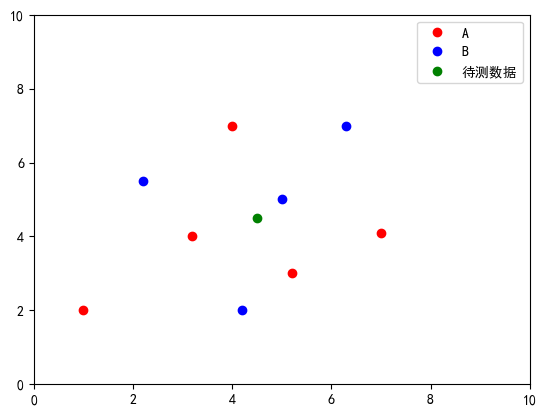

In [1]:
import matplotlib.pyplot as plt
import matplotlib
from math import sqrt

#############################初始化数据集###################################
data_A = [[1,2],[3.2,4],[4,7],[5.2,3],[7,4.1]]#数据集A
data_B = [[2.2,5.5],[4.2,2],[5,5],[6.3,7]]#数据集B
test_data = [[4.5,4.5]]#测试集
len_A = len(data_A)
len_B = len(data_B)

############################计算距离并排序####################################
distance_A = []#与A类数据之间的距离
distance_B = []#与B类数据之间的距离
distance = []#全部距离
#计算距离（使用欧氏距离）
for i in range(len_A):
    d = sqrt((test_data[0][0]-data_A[i][0])**2+(test_data[0][1]-data_A[i][1])**2)
    distance_A.append(d)
for i in range(len_B):
    d = sqrt((test_data[0][0]-data_B[i][0])**2+(test_data[0][1]-data_B[i][1])**2)
    distance_B.append(d)
#由小到大排序（此处使用冒泡排序）
distance = distance_A + distance_B
for i in range(len(distance)-1):
    for j in range(len(distance)-i-1):
        if distance[j] > distance[j+1]:
            distance[j],distance[j+1]=distance[j+1],distance[j]
print("距离所有A类数据的距离为：")
print(distance_A)
print("距离所有B类数据的距离为：")
print(distance_B)
print()
print("对所有的距离升序排序：")
print(distance)
print()

######################按K最近领对测试集进行分类##################################
K = 5#这里默认K值为5，也可以自行更改
number_A = 0
number_B = 0
#定义删除函数，避免对同一个数据重复计算
def delete(a,b,ls):
    for i in range(b):
        if ls[i]==a:
            ls.pop(i)
            break
#找出与测试数据最接近的K个点
for i in range(K):
    if distance[i] in distance_A:
        number_A += 1
        delete(distance[i],len(distance_A),distance_A)
        continue
    if distance[i] in distance_B:
        number_B += 1
        delete(distance[i],len(distance_B),distance_B)
        continue
print("最终结果：")
print("距离待测数据最近的K={:}个数据中，A类数据有{:}个，B类数据有{:}个".format(K,number_A,number_B))
if number_A > number_B:
    print("所以K={:}时，待测数据划分为A类".format(K))
else:
    print("所以K={:}时，待测数据划分为B类".format(K))

#################################画图##########################################
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
for i in range(len_A):#A类，用红色三角形表示
    if i!=len_A-1:
        plt.plot(data_A[i][0],data_A[i][1],'bo',color='red')
    else:
        plt.plot(data_A[i][0],data_A[i][1],'bo',label='A',color='r')
    #使用if..else...是为了避免在图形中重复出现多个标签
for i in range(len_B):#B类，用蓝色正方形表示
    if i!=len_B-1:
        plt.plot(data_B[i][0],data_B[i][1],'bo',color='blue')
    else:
        plt.plot(data_B[i][0],data_B[i][1],'bo',label='B',color='b')
plt.plot(test_data[0][0],test_data[0][1],'bo',label='待测数据',color='g')#测试集
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend()
plt.show()